In [25]:
import re
import pandas as pd
import numpy as np
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline


In [29]:
writing.close()

In [26]:

def nlp_pipeline(text):

    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)

    return text

In [28]:
text = pd.read_csv("result.csv")
corpus = text["text"]
corpus = corpus.astype('str')
corpus_clean = corpus.apply(nlp_pipeline)
corpus_clean.head()
length = corpus.size
print(length)

KeyError: 'text'

In [15]:


neg_polarity = []#only! negative polarities 
pos_polarity = []#only! positive polarities 
polarity = []
extreme = []
writing = open("extremes.txt", "w", encoding="utf-8")
for tweet in corpus_clean:
    PolarityUnit = TextBlob(tweet,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[0]
    if(abs(PolarityUnit)>0.8):
        writing.write(tweet)
        writing.write('\n' )
        writing.write(str(TextBlob(tweet,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[0]))
        writing.write('\n' )
    if PolarityUnit < 0:
        neg_polarity.append(PolarityUnit)
    else:
        neg_polarity.append(0)
    polarity.append(PolarityUnit)
        

In [16]:
writing.close()

<function matplotlib.pyplot.show(close=None, block=None)>

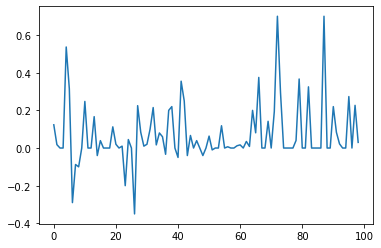

In [24]:
plt.plot(polarity[1001:1100])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

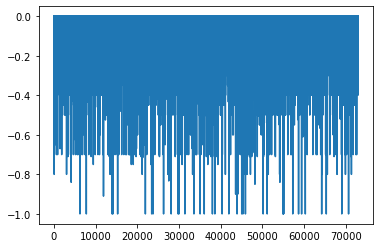

In [18]:
plt.plot(neg_polarity)
plt.show

In [19]:

group = lambda liste, size : [liste[i:i+size] for i in range(0, len(liste), size)]

polarity_par_paquet = group(polarity,length // 50)

liste_moyennes = []
liste_var = []
for l in polarity_par_paquet :
    
    liste_var.append(np.var(l))
    liste_moyennes.append(np.mean(l))

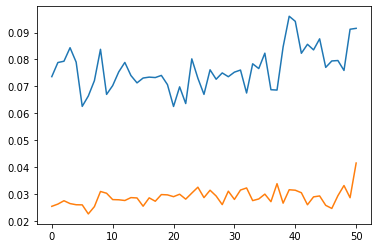

In [20]:
plt.plot(liste_moyennes)
plt.plot(liste_var)

In [21]:
polarity_par_paquet = group(neg_polarity,length // 50)
liste_moyennes = []
liste_var = []
for l in polarity_par_paquet :
    liste_var.append(np.var(l))
    liste_moyennes.append(np.mean(l))

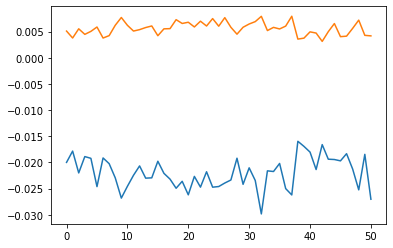

In [22]:
plt.plot(liste_moyennes)
plt.plot(liste_var)

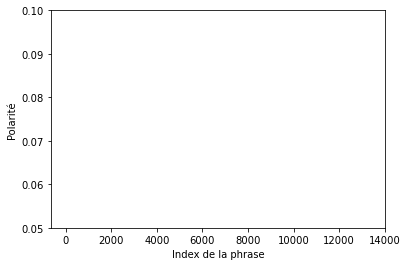

In [14]:
X = []
for i in range(len(polarity)):
    X.append(i)
X=(np.array(X)).reshape(-1,1)
from sklearn.linear_model import LinearRegression
myreg = LinearRegression()
myreg = myreg.fit(X,polarity)

plt.ylim([0.05,0.1]) ; plt.plot(X,myreg.predict(X),"-r",color="#D42D85", linewidth=3) ; plt.xlabel("Index de la phrase") ; plt.ylabel("Polarité") ; plt.show()